## Quantium Virtual Internship

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [34]:
# import dataset
chips = pd.read_excel(r"C:\Users\REY0K\Desktop\Quantium\QVI_transaction_data.xlsx")
chips_dem = pd.read_csv(r"C:\Users\REY0K\Desktop\Quantium\QVI_purchase_behaviour.csv")

In [35]:
# Exploring the datasets
chips.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [36]:
# exploring data types and for missing values
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [37]:
chips_dem.head(6)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget


In [38]:
# exploring data types and for missing values
chips_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [39]:
# exploring column and counts
chips_dem['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [40]:
# exploring column and counts
chips_dem['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [41]:
# Convert "DATE" column into datetime
chips['DATE'] = pd.TimedeltaIndex(chips['DATE'], unit='d') + dt.datetime(1899,12,30)
chips.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [42]:
# Examin PROD_NAME
chips['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [43]:
# seperating chips weight
chips['WEIGHT'] = chips['PROD_NAME'].str[-4:]
chips['WEIGHT'].value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: WEIGHT, dtype: int64

In [44]:
# correcting the data
chips['WEIGHT'] = chips['WEIGHT'].replace({'Salt':'135g', '175G':'175g', '150G':'150g', '210G':'210g'})
chips['WEIGHT'].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [45]:
# drooping 'salsa' from the datasets because is not a chip

index_drop = chips[chips['PROD_NAME'] == 'Old El Paso Salsa'].index

chips = chips.drop(index_drop)

In [46]:
# confirming salsa was dropped
chips[chips["PROD_NAME"] == "Old El Paso Salsa"].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
dtype: int64

In [47]:
# seperating chips Brand
chips["BRAND"] = chips['PROD_NAME'].str.split().str.get(0)
chips["BRAND"].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [49]:
# correcting the duplicate brand name
chips["BRAND"] = chips["BRAND"].replace({'Red':'RRD', 'Smith':'Smiths', 'Dorito':'Doritos', 'Infzns':'Infuzions', 'Snbts':'Sunbites', 'Grain':'GrnWves', 'WW':'Woolworths', 'NCC':'Natural'})
chips["BRAND"].value_counts()

Kettle        41288
Smiths        31823
Doritos       28147
Pringles      25102
RRD           17779
Woolworths    14757
Infuzions     14201
Thins         14075
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND, dtype: int64

In [50]:
# lets check the date column
chips_date = chips.sort_values(by='DATE')

# Calculate the expected date range
start_date = chips_date['DATE'].min()
end_date = chips_date['DATE'].max()
expected_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Compare the actual date range with the expected date range
if expected_date_range.equals(chips_date['DATE']):
    print(f"The {DATE} column contains a complete range of dates.")
else:
    # Identify missing dates or gaps
    missing_dates = expected_date_range[~expected_date_range.isin(chips_date['DATE'])]
    print(f"The {'DATE'} column has the following missing dates or gaps:")
    print(missing_dates)

The DATE column has the following missing dates or gaps:
DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [51]:
# adding the missing date and creating a datetime column
chips['SHORT_DATE'] = pd.to_datetime(chips['DATE']).dt.strftime("%Y-%m-%d")
chips_christmas = {"SHORT_DATE": "2018-12-25"}
chips = chips.append(chips_christmas, ignore_index=True)
chips["SHORT_DATE"].value_counts(dropna=False)

C:\Users\REY0K\AppData\Local\Temp\ipykernel_2088\3988055390.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chips = chips.append(chips_christmas, ignore_index=True)


2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
2018-12-25      1
Name: SHORT_DATE, Length: 365, dtype: int64

In [52]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175g,Natural,2018-10-17
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175g,CCs,2019-05-14
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170g,Smiths,2019-05-20
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175g,Smiths,2018-08-17
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150g,Kettle,2018-08-18
...,...,...,...,...,...,...,...,...,...,...,...
264832,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,175g,Tostitos,2018-08-13
264833,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,170g,Doritos,2018-11-06
264834,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,150g,Doritos,2018-12-27
264835,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,175g,Tostitos,2018-09-22


In [53]:
chips.sort_values(by='TOT_SALES')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
204061,2019-05-16,41.0,41280.0,38218.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-05-16
81945,2019-05-05,9.0,9179.0,8587.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2019-05-05
112186,2019-03-24,188.0,188046.0,189373.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-03-24
117979,2018-08-14,247.0,247086.0,249122.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2018-08-14
185349,2018-08-19,183.0,183209.0,186061.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2018-08-19
...,...,...,...,...,...,...,...,...,...,...,...
5179,2018-08-15,94.0,94148.0,93390.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15
150683,2019-05-20,118.0,118021.0,120799.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-20
69763,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20
69762,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19


In [54]:
# Looking at the output above looks like we have an outliers
chips[chips["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
69762,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19
69763,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20


In [55]:
# Dropping the outliers from the dataset
chips = chips.drop([69762, 69763])
chips = chips.reset_index(drop=True)

In [56]:
chips.sort_values(by='TOT_SALES')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
27969,2018-07-30,255.0,255043.0,254583.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2018-07-30
253544,2019-03-07,205.0,205164.0,204236.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-03-07
186492,2019-01-28,18.0,18098.0,15308.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-01-28
98642,2019-02-18,266.0,266479.0,264307.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-02-18
78589,2018-09-02,220.0,220445.0,220012.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2018-09-02
...,...,...,...,...,...,...,...,...,...,...,...
55558,2019-05-14,190.0,190113.0,190914.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-14
117848,2019-05-19,194.0,194308.0,194516.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-19
184967,2019-05-20,44.0,44350.0,40394.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-20
150681,2019-05-20,118.0,118021.0,120799.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-20


In [57]:
# merging both datasets
chips_merged = pd.merge(chips, chips_dem, on= "LYLTY_CARD_NBR", how="left")
chips_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175g,Natural,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175g,CCs,2019-05-14,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170g,Smiths,2019-05-20,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175g,Smiths,2018-08-17,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150g,Kettle,2018-08-18,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-08-13,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,175g,Tostitos,2018-08-13,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,170g,Doritos,2018-11-06,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,150g,Doritos,2018-12-27,YOUNG SINGLES/COUPLES,Premium
264833,2018-09-22,272.0,272380.0,270189.0,74.0,Tostitos Splash Of Lime 175g,2.0,8.8,175g,Tostitos,2018-09-22,YOUNG SINGLES/COUPLES,Premium


In [58]:
# reorganizing the columns
chips_final = chips_merged[["SHORT_DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NBR", "PROD_NAME", "BRAND", "WEIGHT", "PROD_QTY", "TOT_SALES"]]
chips_final

,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,PROD_NAME,BRAND,WEIGHT,PROD_QTY,TOT_SALES
0,2018-10-17,1.0,1000.0,1.0,YOUNG SINGLES/COUPLES,Premium,5.0,Natural Chip Compny SeaSalt175g,Natural,175g,2.0,6.0
1,2019-05-14,1.0,1307.0,348.0,MIDAGE SINGLES/COUPLES,Budget,66.0,CCs Nacho Cheese 175g,CCs,175g,3.0,6.3
2,2019-05-20,1.0,1343.0,383.0,MIDAGE SINGLES/COUPLES,Budget,61.0,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170g,2.0,2.9
3,2018-08-17,2.0,2373.0,974.0,MIDAGE SINGLES/COUPLES,Budget,69.0,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,175g,5.0,15.0
4,2018-08-18,2.0,2426.0,1038.0,MIDAGE SINGLES/COUPLES,Budget,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150g,3.0,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-08-13,272.0,272358.0,270154.0,YOUNG SINGLES/COUPLES,Premium,74.0,Tostitos Splash Of Lime 175g,Tostitos,175g,1.0,4.4
264831,2018-11-06,272.0,272379.0,270187.0,YOUNG SINGLES/COUPLES,Premium,51.0,Doritos Mexicana 170g,Doritos,170g,2.0,8.8
264832,2018-12-27,272.0,272379.0,270188.0,YOUNG SINGLES/COUPLES,Premium,42.0,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150g,2.0,7.8
264833,2018-09-22,272.0,272380.0,270189.0,YOUNG SINGLES/COUPLES,Premium,74.0,Tostitos Splash Of Lime 175g,Tostitos,175g,2.0,8.8


In [59]:
# saving to csv
chips_final.to_csv('chips_final.csv')

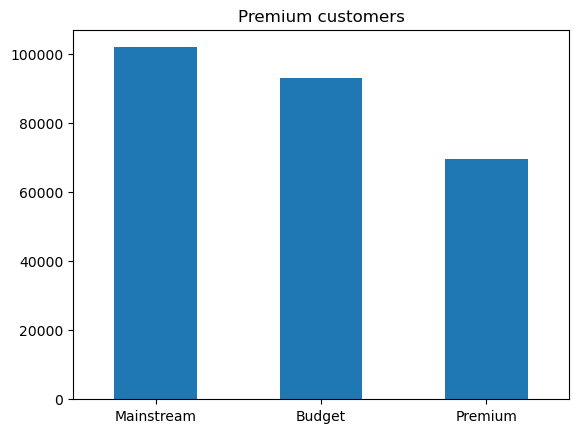

In [60]:
# the data set is ready we can explore it and gather some indight
pc_vc = chips_final['PREMIUM_CUSTOMER'].value_counts()
pc_vc.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Premium customers')
plt.show()

In [61]:
# creating a dataset of just unique member number and counting it by premium customer
unique_member = chips_final.drop_duplicates(subset='LYLTY_CARD_NBR')

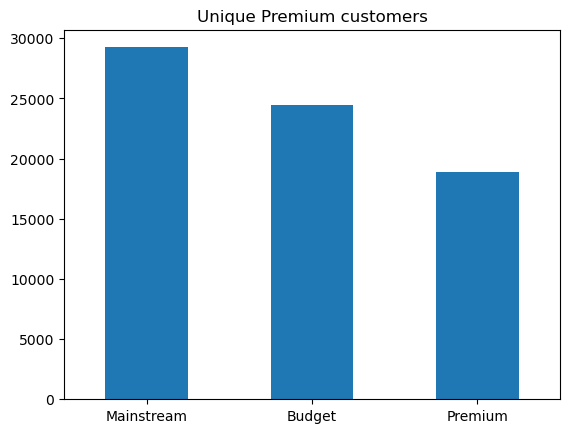

In [62]:
um_vc = unique_member['PREMIUM_CUSTOMER'].value_counts()
um_vc.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Unique Premium customers')
plt.show()

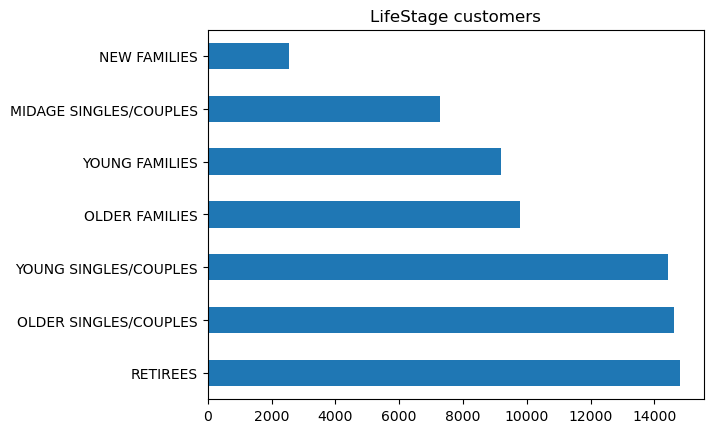

In [63]:
# viewing the lifestage customer segment
um_ls = unique_member['LIFESTAGE'].value_counts()

um_ls.plot(kind='barh')
plt.xticks(rotation=360)
plt.title('LifeStage customers')
plt.show()

In [64]:
# grouping by brand
chips_br = chips_final.groupby('BRAND')

In [65]:
# totaling the sales with each brand
chips_sales_brand = chips_br['TOT_SALES'].sum()

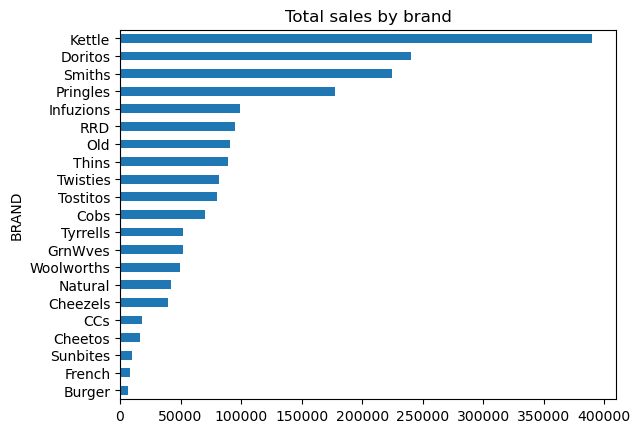

In [66]:
# viewing the the top sold brand
chips_sales_brand.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Total sales by brand')
plt.show()

In [67]:
# groubing by NBR
chips_nbr = chips_final.groupby('LYLTY_CARD_NBR')
chips_sales_nbr = chips_nbr['TOT_SALES'].sum()

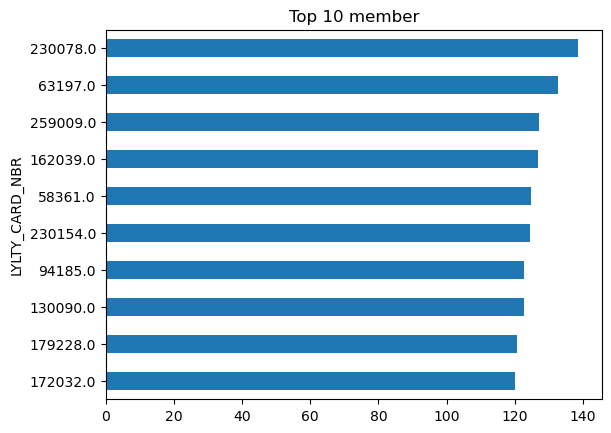

In [68]:
# plot the top 10 member by sales
chips_sorted = chips_sales_nbr.sort_values()

chips_sorted.tail(10).plot(kind='barh')
plt.title('Top 10 member')
plt.show()

In [69]:
chips_sorted.describe()

count    72636.000000
mean        26.613731
std         20.271119
min          1.500000
25%          9.100000
50%         21.700000
75%         40.000000
max        138.600000
Name: TOT_SALES, dtype: float64

In [70]:
# groubing by lifestage and extracting by tot sales
chips_ls = chips_final.groupby('LIFESTAGE')
chips_sales_ls = chips_ls['TOT_SALES'].sum()

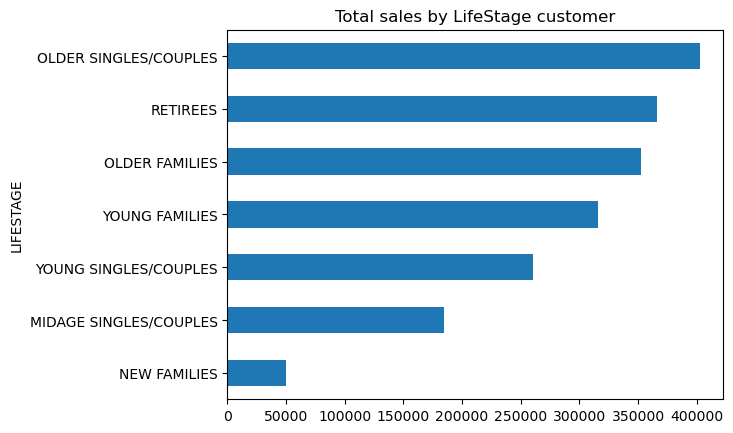

In [71]:
chips_sales_ls.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Total sales by LifeStage customer')
plt.show()

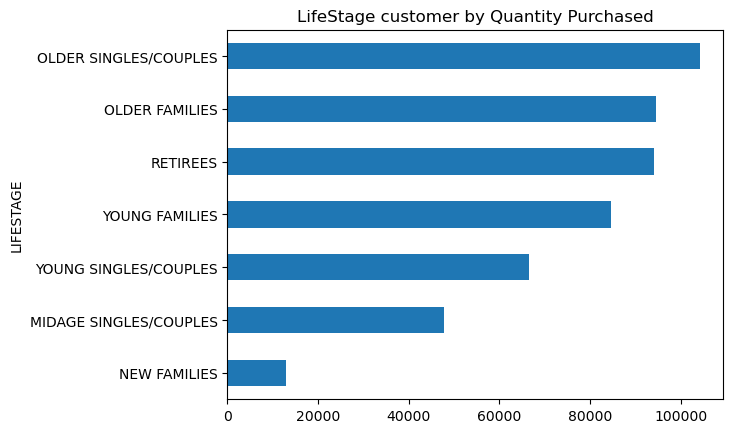

In [72]:
chips_ls_qty = chips_ls['PROD_QTY'].sum()

chips_ls_qty.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('LifeStage customer by Quantity Purchased')
plt.show()

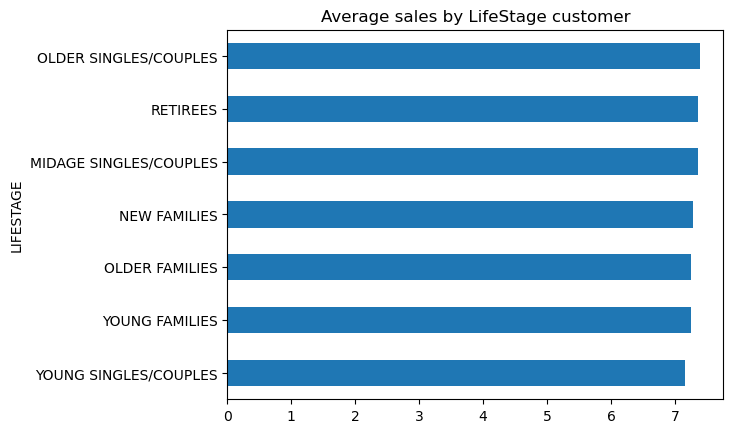

In [73]:
# viewing the average sales by lifstage
chips_avg_sales_ls = chips_ls['TOT_SALES'].mean()
chips_avg_sales_ls.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Average sales by LifeStage customer')
plt.show()

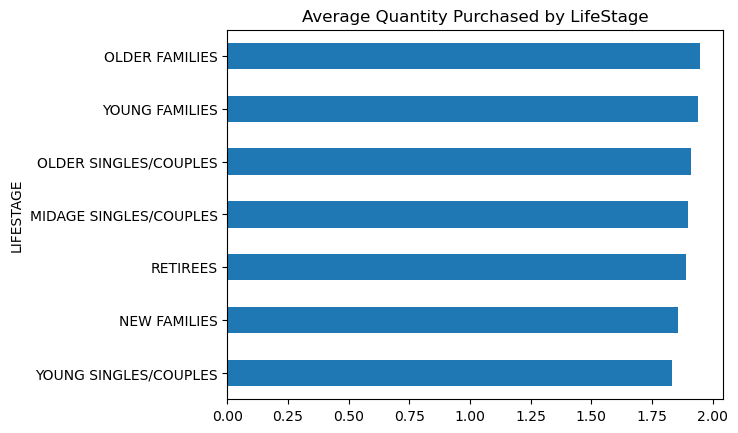

In [74]:
# viewing the Average quantity purchased by lifestage
chips_ls_avg_qty = chips_ls['PROD_QTY'].mean()

chips_ls_avg_qty.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Average Quantity Purchased by LifeStage')
plt.show()

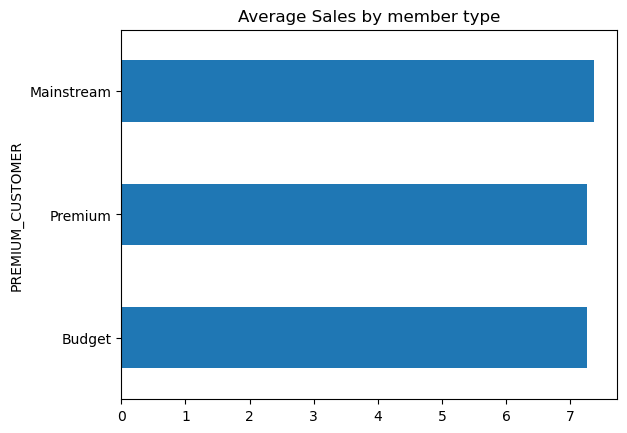

In [75]:
# viewing the average sales by member type
chips_pt = chips_final.groupby('PREMIUM_CUSTOMER')
chips_pt_avg_sales = chips_pt['TOT_SALES'].mean()
chips_pt_avg_sales.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Average Sales by member type')
plt.show()

In [76]:
chips_pt_avg_sales.round(3)

PREMIUM_CUSTOMER
Budget        7.259
Mainstream    7.361
Premium       7.263
Name: TOT_SALES, dtype: float64

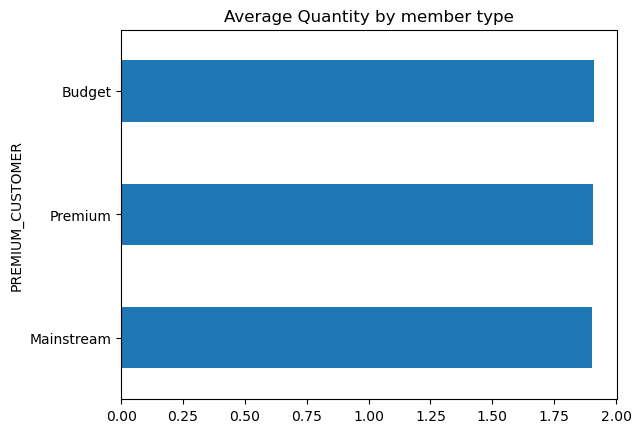

In [77]:

chips_pt_avg_qty = chips_pt['PROD_QTY'].mean()
chips_pt_avg_qty.sort_values().plot(kind='barh')
plt.xticks(rotation=360)
plt.title('Average Quantity by member type')
plt.show()

In [78]:
chips_pt_avg_qty.round(3)

PREMIUM_CUSTOMER
Budget        1.910
Mainstream    1.902
Premium       1.906
Name: PROD_QTY, dtype: float64

In [79]:
# viewing total sales by premium customer and brand
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
chips_pt['BRAND'].value_counts()

PREMIUM_CUSTOMER  BRAND     
Budget            Kettle        14154
                  Smiths        11548
                  Doritos        9818
                  Pringles       8620
                  RRD            6480
                  Woolworths     5486
                  Thins          4931
                  Infuzions      4922
                  Cobs           3274
                  Tostitos       3236
                  Twisties       3229
                  Old            3203
                  Natural        2785
                  GrnWves        2656
                  Tyrrells       2195
                  CCs            1679
                  Cheezels       1626
                  Sunbites       1146
                  Cheetos        1051
                  Burger          579
                  French          539
Mainstream        Kettle        16423
                  Smiths        11842
                  Doritos       11192
                  Pringles       9903
                  RRD

In [80]:
# creating pivot table and looking for difference in purchase behavior between brands

customer_type_count = chips_final['PREMIUM_CUSTOMER'].value_counts()
pivot_table = chips_final.pivot_table(index='PREMIUM_CUSTOMER', columns='BRAND', aggfunc='size', fill_value=0)
percentage_difference = (pivot_table / customer_type_count[:, np.newaxis]) * 100
percentage_difference

C:\Users\REY0K\AppData\Local\Temp\ipykernel_2088\1656387506.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentage_difference = (pivot_table / customer_type_count[:, np.newaxis]) * 100


BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,GrnWves,Infuzions,Kettle,Natural,Old,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
PREMIUM_CUSTOMER,,,,,,,,,,,,,,,,,,,,,
Budget,0.567714,1.646272,1.030513,1.594305,3.210182,9.626623,0.528494,2.604228,4.826058,13.878103,2.730713,3.140566,8.451975,6.353689,11.322901,1.123662,4.834883,3.172922,3.166059,2.152214,5.379064
Mainstream,0.588254,1.750808,1.192610,1.862447,4.174673,12.014127,0.544243,3.260088,5.957684,17.629378,2.852174,3.998626,10.630441,6.936677,12.711874,1.118542,5.835310,4.011507,4.063033,2.772738,5.574460
Premium,0.627072,1.780769,1.097734,1.782204,3.630415,10.238345,0.533800,2.937336,5.350916,15.369714,2.908637,3.438132,9.440514,6.940837,12.100905,1.176656,5.320782,3.584497,3.501270,2.387751,5.851713


There is not much difference from lifestage and member type when it comes to average sales and quantity

In [81]:
# exploring the wwight bag purchased
chips_final['WEIGHT'].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [82]:
chips_final['WEIGHT'] = chips_final['WEIGHT'].astype(str)

C:\Users\REY0K\AppData\Local\Temp\ipykernel_2088\1537273977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_final['WEIGHT'] = chips_final['WEIGHT'].astype(str)


In [83]:
# creating custom category of chips bag size

weight_category_map= {
    ' 70g':'Extra Small',
    ' 90g':'Extra Small',
    '110g':'Small',
    '125g':'Small',
    '134g':'Small',
    '135g':'Small',
    '150g':'Small',
    '160g':'Small',
    '165g':'Small',
    '170g':'Small',
    '175g':'Small',
    '180g':'Small',
    '190g':'Small',
    '200g':'Medium',
    '210g':'Medium',
    '220g':'Medium',
    '250g':'Medium',
    '270g':'Medium',
    '300g':'Large',
    '330g':'Large',
    '380g':'Large',
    'nan' : np.nan
}
chips_final['BAG_SIZE'] = chips_final['WEIGHT'].map(weight_category_map)

In [84]:
chips_final['BAG_SIZE'].value_counts()

Small          204434
Large           34122
Medium          21763
Extra Small      4515
Name: BAG_SIZE, dtype: int64

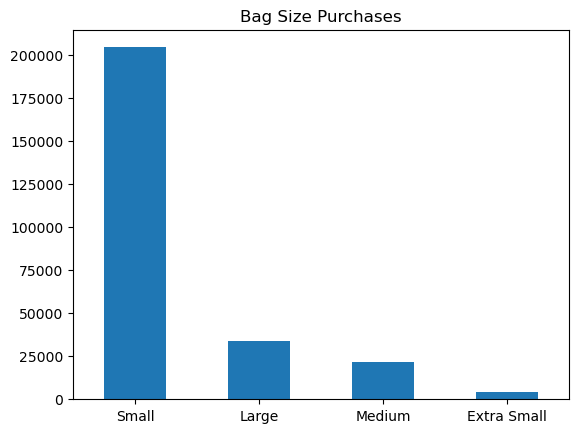

In [85]:
chips_bs = chips_final['BAG_SIZE'].value_counts()

chips_bs.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Bag Size Purchases')
plt.show()

In [86]:
# saving to csv with new bag size column
chips_final.to_csv('chips_final.csv')

Preliminary notes:
- Largest customer type is Mainstream group
- Largest Membership group is the older population
- Top 10 members spent over 120 Dollars in chips within a year
- Top 4 Brand sold are: Kattle, Doritos, Smiths, and Pringles
- older individuals purchased the most chips wich include single individuals and families, New families purchased the least on chips
- The most purchased sized chips were the small bags and then large bags. The common medium bags and extra small were sold the least